In [1]:
%load_ext autoreload
%autoreload 2

import json
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
results_file = 'configurations/RS11_11_cluster5_4_merged.json'

# Loading Results

In [3]:
def json_results_to_dataframe(json_data):
    experiments = []
    metadata = json_data['metadata']

    for exp in json_data['experiments']:
        # Skip experiments with no results
        if exp['total_reward'] is None or exp['total_discounted_reward'] is None:
            continue

        # For each run in the experiment
        for run_idx, (total_reward, discounted_reward) in enumerate(zip(
            exp['total_reward'], exp['total_discounted_reward'])):

            exp_data = {
                'experiment_id': exp['experiment_id'],
                'env_instance_id': exp['env_instance_id'],
                'state_id': exp['state_id'],
                'help_config_id': exp['help_config_id'],
                'rover_position': str(exp['rover_position']),
                'rock_locations': str(exp['rock_locations']),
                'rock_types': str(exp['rock_types']),
                'help_actions': str(exp['help_actions']),
                'total_reward': total_reward,
                'total_discounted_reward': discounted_reward,
                'run_id': run_idx
            }
            experiments.append(exp_data)

    df = pd.DataFrame(experiments)
    return df, metadata

In [4]:
with open(results_file) as f:
    json_data = json.load(f)

df, metadata = json_results_to_dataframe(json_data)
df

,experiment_id,env_instance_id,state_id,help_config_id,rover_position,rock_locations,rock_types,help_actions,total_reward,total_discounted_reward,run_id
0,0,0,0,-1,"[0, 10]","{'(5, 4)': 0, '(2, 9)': 1, '(7, 4)': 2, '(9, 7...","['good', 'good', 'bad', 'bad', 'good', 'good',...",{},50.0,21.970854,0
1,0,0,0,-1,"[0, 10]","{'(5, 4)': 0, '(2, 9)': 1, '(7, 4)': 2, '(9, 7...","['good', 'good', 'bad', 'bad', 'good', 'good',...",{},50.0,21.473110,1
2,0,0,0,-1,"[0, 10]","{'(5, 4)': 0, '(2, 9)': 1, '(7, 4)': 2, '(9, 7...","['good', 'good', 'bad', 'bad', 'good', 'good',...",{},40.0,19.465957,2
3,1,0,0,0,"[0, 10]","{'(5, 4)': 0, '(2, 9)': 1, '(7, 4)': 2, '(9, 7...","['good', 'good', 'bad', 'bad', 'good', 'good',...","{'1': [0, -4], '7': [-5, -1], '10': [-1, -6]}",60.0,15.239265,0
4,1,0,0,0,"[0, 10]","{'(5, 4)': 0, '(2, 9)': 1, '(7, 4)': 2, '(9, 7...","['good', 'good', 'bad', 'bad', 'good', 'good',...","{'1': [0, -4], '7': [-5, -1], '10': [-1, -6]}",20.0,3.754686,1
...,...,...,...,...,...,...,...,...,...,...,...
104372,34898,9,99,46,"[0, 3]","{'(0, 6)': 0, '(6, 4)': 1, '(4, 1)': 2, '(3, 4...","['bad', 'bad', 'good', 'good', 'good', 'good',...","{'8': [-8, -8], '9': [-6, -5], '10': [-4, -7]}",40.0,22.198517,1
104373,34898,9,99,46,"[0, 3]","{'(0, 6)': 0, '(6, 4)': 1, '(4, 1)': 2, '(3, 4...","['bad', 'bad', 'good', 'good', 'good', 'good',...","{'8': [-8, -8], '9': [-6, -5], '10': [-4, -7]}",60.0,31.468651,2
104374,34899,9,99,47,"[0, 3]","{'(0, 6)': 0, '(6, 4)': 1, '(4, 1)': 2, '(3, 4...","['bad', 'bad', 'good', 'good', 'good', 'good',...","{'9': [-5, 1], '10': [-5, 0], '8': [-8, -3]}",50.0,27.572161,0
104375,34899,9,99,47,"[0, 3]","{'(0, 6)': 0, '(6, 4)': 1, '(4, 1)': 2, '(3, 4...","['bad', 'bad', 'good', 'good', 'good', 'good',...","{'9': [-5, 1], '10': [-5, 0], '8': [-8, -3]}",50.0,27.340279,1


In [5]:
instances_count = df.groupby('env_instance_id').agg({
    'state_id': 'nunique',
    'help_config_id': 'nunique'
}).reset_index()

# Check which instances have complete experiments (15 states and at least 10 help configs) (that's almost complete instances)
complete_instances = instances_count[
    (instances_count['state_id'] >= 20) &
    (instances_count['help_config_id'] >= 10)
]['env_instance_id'].tolist()

print(f"Number of instances: {len(instances_count)}")
print(f"Number of complete instances: {len(complete_instances)}")

# Filter for complete instances only
df_complete = df[df['env_instance_id'].isin(complete_instances)]

# Count experiments with less than 3 runs
experiment_runs = df_complete.groupby(['env_instance_id', 'state_id', 'help_config_id']).size().reset_index(name='run_count')

print(f"\nNumber of experiments with at least 3 runs: {len(experiment_runs[experiment_runs['run_count'] >= 3])}")
print(f"Number of experiments with less than 3 runs: {len(experiment_runs[experiment_runs['run_count'] < 3])}")
print(f"Number of experiments with less than 2 runs: {len(experiment_runs[experiment_runs['run_count'] < 2])}")
print(f"Number of experiments with less than 1 runs: {len(experiment_runs[experiment_runs['run_count'] < 1])}")

env_instances_ids = df_complete['env_instance_id'].unique()
print(f"complete instances: {env_instances_ids}")

Number of instances: 10
Number of complete instances: 10

Number of experiments with at least 3 runs: 34593
Number of experiments with less than 3 runs: 307
Number of experiments with less than 2 runs: 16
Number of experiments with less than 1 runs: 0
complete instances: [0 1 2 3 4 5 6 7 8 9]


In [6]:
# env_instances_to_analyze = [0,]
env_instances_to_analyze = env_instances_ids

df_complete = df_complete[df_complete['env_instance_id'].isin(env_instances_to_analyze)]

# Statistics

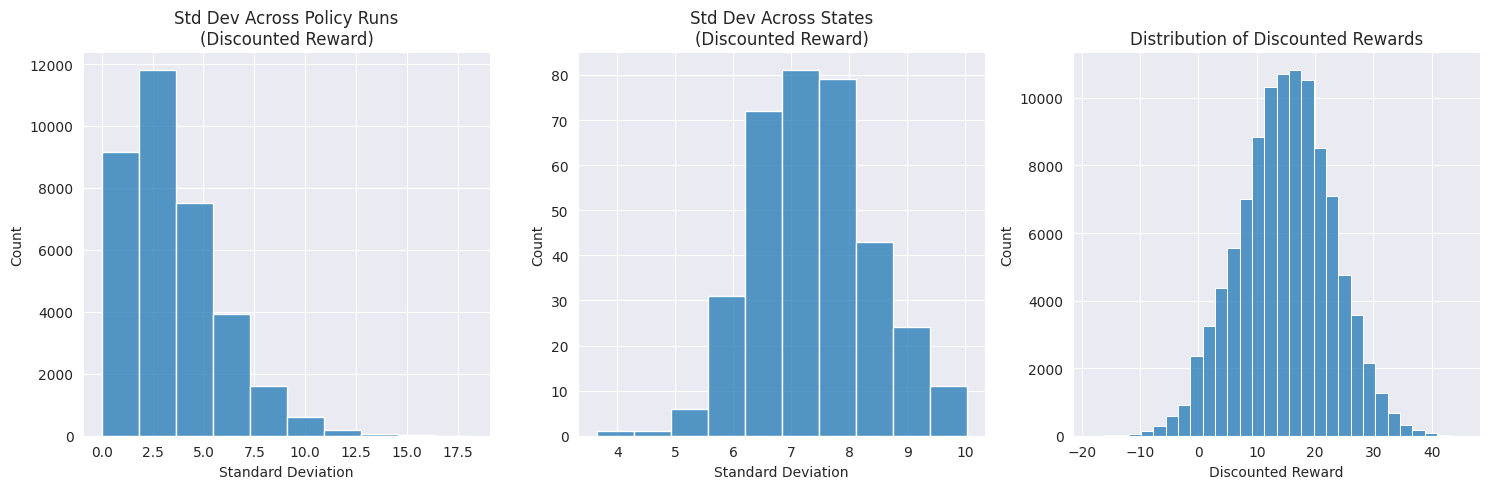


Policy StdDev Statistics (Discounted Reward):
count    34884.000000
mean         3.483947
std          2.307794
min          0.000000
25%          1.752247
50%          3.018790
75%          4.780122
max         18.164537
Name: policy_std, dtype: float64

State StdDev Statistics (Discounted Reward):
count    349.000000
mean       7.361332
std        1.005228
min        3.640584
25%        6.598916
50%        7.335704
75%        8.042176
max       10.022646
Name: state_std, dtype: float64

Ratio of mean state stddev to mean policy stddev: 2.11

Overall Discounted Reward Statistics:
count    104377.000000
mean         14.892814
std           7.990787
min         -18.314320
25%           9.598760
50%          15.096205
75%          20.348627
max          45.107541
Name: total_discounted_reward, dtype: float64


In [7]:
def analyze_discounted_stds():
   # Calculate std across runs for each (env_instance, help_config, state) combination
   policy_std = df_complete.groupby(['env_instance_id', 'help_config_id', 'state_id'])['total_discounted_reward'].std().reset_index(name='policy_std')

   # Calculate std across states for each (env_instance, help_config) combination
   state_std = df_complete.groupby(['env_instance_id', 'help_config_id'])['total_discounted_reward'].std().reset_index(name='state_std')

   # Create plots
   plt.figure(figsize=(15, 5))

   # Plot 1: Distribution of policy stds
   plt.subplot(131)
   sns.histplot(policy_std['policy_std'].dropna(), bins=10)
   plt.title('Std Dev Across Policy Runs\n(Discounted Reward)')
   plt.xlabel('Standard Deviation')

   # Plot 2: Distribution of state stds
   plt.subplot(132)
   sns.histplot(state_std['state_std'].dropna(), bins=10)
   plt.title('Std Dev Across States\n(Discounted Reward)')
   plt.xlabel('Standard Deviation')

   # Plot 3: Distribution of rewards
   plt.subplot(133)
   sns.histplot(df_complete['total_discounted_reward'], bins=30)
   plt.title('Distribution of Discounted Rewards')
   plt.xlabel('Discounted Reward')

   plt.tight_layout()
   plt.show()

   # Print statistics
   print("\nPolicy StdDev Statistics (Discounted Reward):")
   print(policy_std['policy_std'].describe())
   print("\nState StdDev Statistics (Discounted Reward):")
   print(state_std['state_std'].describe())

   # Calculate the ratio of standard deviations
   mean_policy_std = policy_std['policy_std'].mean()
   mean_state_std = state_std['state_std'].mean()
   print(f"\nRatio of mean state stddev to mean policy stddev: {mean_state_std/mean_policy_std:.2f}")

   print("\nOverall Discounted Reward Statistics:")
   print(df_complete['total_discounted_reward'].describe())

analyze_discounted_stds()

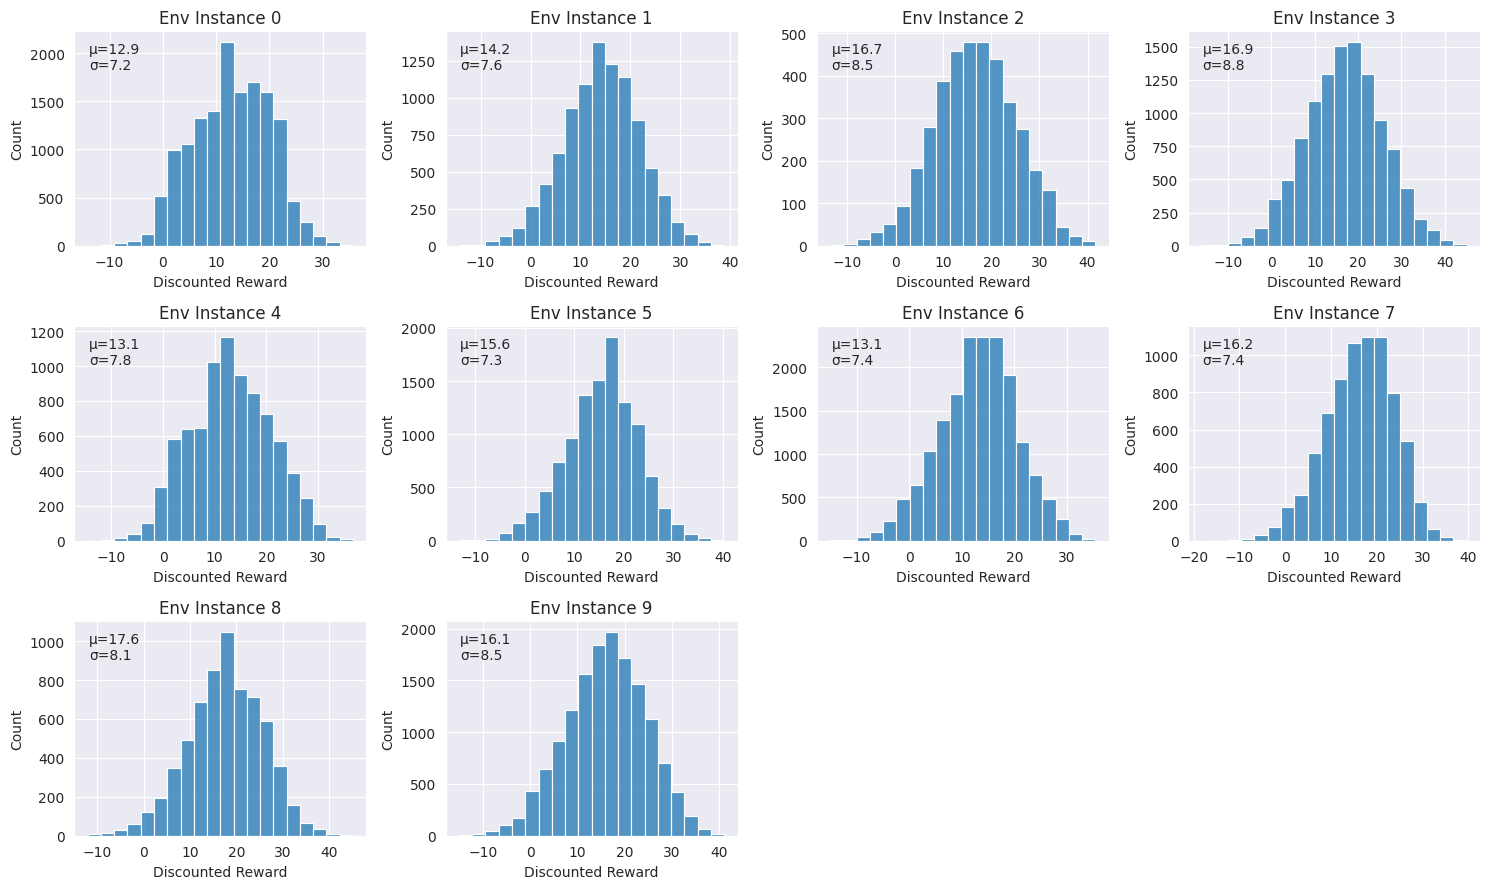


Summary statistics per environment:
                   count       mean       std        min        25%  \
env_instance_id                                                       
0                14700.0  12.885796  7.185228 -14.109601   7.743712   
1                 9299.0  14.198038  7.578774 -14.324814   9.181228   
2                 3900.0  16.719235  8.492737 -13.574050  10.870361   
3                11096.0  16.932780  8.847505 -16.158382  10.905679   
4                 8376.0  13.071416  7.774099 -14.607889   7.556848   
5                11071.0  15.584193  7.270016 -13.295852  10.935778   
6                17298.0  13.114116  7.388657 -15.005923   8.282366   
7                 7473.0  16.195054  7.447332 -18.314320  11.281155   
8                 6551.0  17.625723  8.146527 -12.045597  12.436160   
9                14613.0  16.052068  8.458636 -15.047778  10.408703   

                       50%        75%        max  
env_instance_id                                   
0       

In [8]:
# Create a subplot grid based on number of environments
n_envs = len(env_instances_to_analyze)
n_cols = 4  # We can adjust this number to change layout
n_rows = (n_envs + n_cols - 1) // n_cols  # Ceiling division to get required rows

plt.figure(figsize=(15, 3*n_rows))

for idx, env_id in enumerate(env_instances_to_analyze):
    plt.subplot(n_rows, n_cols, idx + 1)
    env_data = df_complete[df_complete['env_instance_id'] == env_id]

    sns.histplot(data=env_data, x='total_discounted_reward', bins=20)
    plt.title(f'Env Instance {env_id}')
    plt.xlabel('Discounted Reward')

    # Add mean and std as text
    mean_reward = env_data['total_discounted_reward'].mean()
    std_reward = env_data['total_discounted_reward'].std()
    plt.text(0.05, 0.95, f'μ={mean_reward:.1f}\nσ={std_reward:.1f}',
             transform=plt.gca().transAxes,
             verticalalignment='top')

plt.tight_layout()
plt.show()

# Print summary statistics for each environment
print("\nSummary statistics per environment:")
print(df_complete.groupby('env_instance_id')['total_discounted_reward'].describe())

# Compute VD and VOA


Value Difference Statistics:
count    33900.000000
mean        -1.618961
std          5.363838
min        -26.468260
25%         -4.702289
50%         -1.164158
75%          1.787436
max         21.298784
Name: value_diff, dtype: float64

Empirical VOA Statistics:
count    339.000000
mean      -1.618961
std        2.848810
min      -10.213473
25%       -3.302777
50%       -1.395064
75%        0.476749
max        4.140746
Name: empirical_voa, dtype: float64


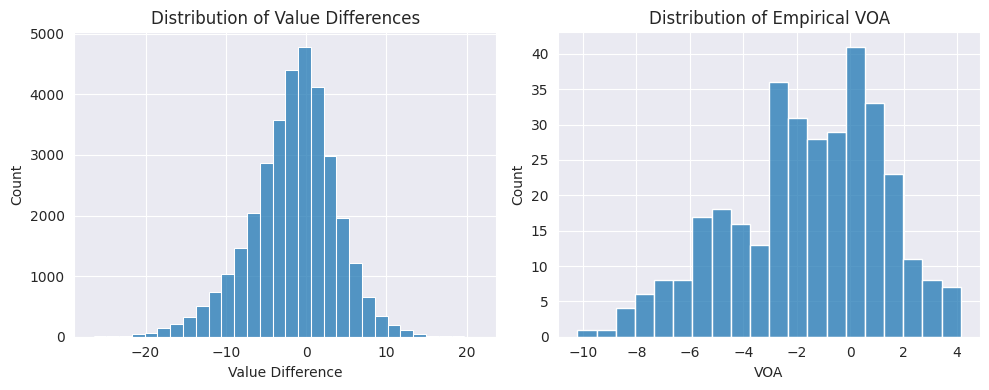


Value Difference Statistics:
count    33900.000000
mean        -1.618961
std          5.363838
min        -26.468260
25%         -4.702289
50%         -1.164158
75%          1.787436
max         21.298784
Name: value_diff, dtype: float64

VOA Statistics:
count    339.000000
mean      -1.618961
std        2.848810
min      -10.213473
25%       -3.302777
50%       -1.395064
75%        0.476749
max        4.140746
Name: empirical_voa, dtype: float64


In [9]:
def compute_value_differences(df):
    # First average across runs for each experiment configuration
    baseline_means = df[df['help_config_id'] == -1].groupby(
        ['env_instance_id', 'state_id'])['total_discounted_reward'].mean().reset_index()

    value_diff_results = []
    for _, baseline_row in baseline_means.iterrows():
        env_instance_id = baseline_row['env_instance_id']
        state_id = baseline_row['state_id']
        baseline_reward = baseline_row['total_discounted_reward']  # This is now mean across runs

        # Get mean rewards for help experiments while preserving help_actions
        help_exps = df[
            (df['env_instance_id'] == env_instance_id) &
            (df['state_id'] == state_id) &
            (df['help_config_id'] != -1)
        ].groupby(['env_instance_id', 'state_id', 'help_config_id']
        ).agg({
            'total_discounted_reward': 'mean',
            'help_actions': 'first',
            'rover_position': 'first',
            'rock_locations': 'first',
            'rock_types': 'first'
        }).reset_index()

        for _, help_row in help_exps.iterrows():
            result_dict = help_row.to_dict()
            result_dict['value_diff'] = help_row['total_discounted_reward'] - baseline_reward
            result_dict['baseline_value'] = baseline_reward
            value_diff_results.append(result_dict)

    return pd.DataFrame(value_diff_results)

def compute_empirical_voa(vd_df):
    # Since states are sampled uniformly, we can just average over states
    # Group by env_instance_id and help_config_id
    voa_results = []

    for (env_id, help_config), group in vd_df.groupby(['env_instance_id', 'help_config_id']):
        # Compute mean value difference (VOA)
        empirical_voa = group['value_diff'].mean()
        # Compute variance
        empirical_variance = group['value_diff'].var()

        voa_results.append({
            'env_instance_id': env_id,
            'help_config_id': help_config,
            'help_actions': group['help_actions'].iloc[0],
            'rover_position': group['rover_position'].iloc[0],
            'rock_locations': group['rock_locations'].iloc[0],
            'empirical_voa': empirical_voa,
            'empirical_voa_variance': empirical_variance,
            'n_states': len(group),
            'baseline_value': group['baseline_value'].mean()
        })

    return pd.DataFrame(voa_results)

vd_df = compute_value_differences(df_complete)
voa_df = compute_empirical_voa(vd_df)

print("\nValue Difference Statistics:")
print(vd_df['value_diff'].describe())

print("\nEmpirical VOA Statistics:")
print(voa_df['empirical_voa'].describe())

plt.figure(figsize=(10, 4))

# Plot 1: Distribution of Value Differences
plt.subplot(121)
sns.histplot(vd_df['value_diff'], bins=30)
plt.title('Distribution of Value Differences')
plt.xlabel('Value Difference')
plt.ylabel('Count')

# Plot 2: Distribution of VOA
plt.subplot(122)
sns.histplot(voa_df['empirical_voa'], bins=20)
plt.title('Distribution of Empirical VOA')
plt.xlabel('VOA')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

# Print statistics
print("\nValue Difference Statistics:")
print(vd_df['value_diff'].describe())
print("\nVOA Statistics:")
print(voa_df['empirical_voa'].describe())

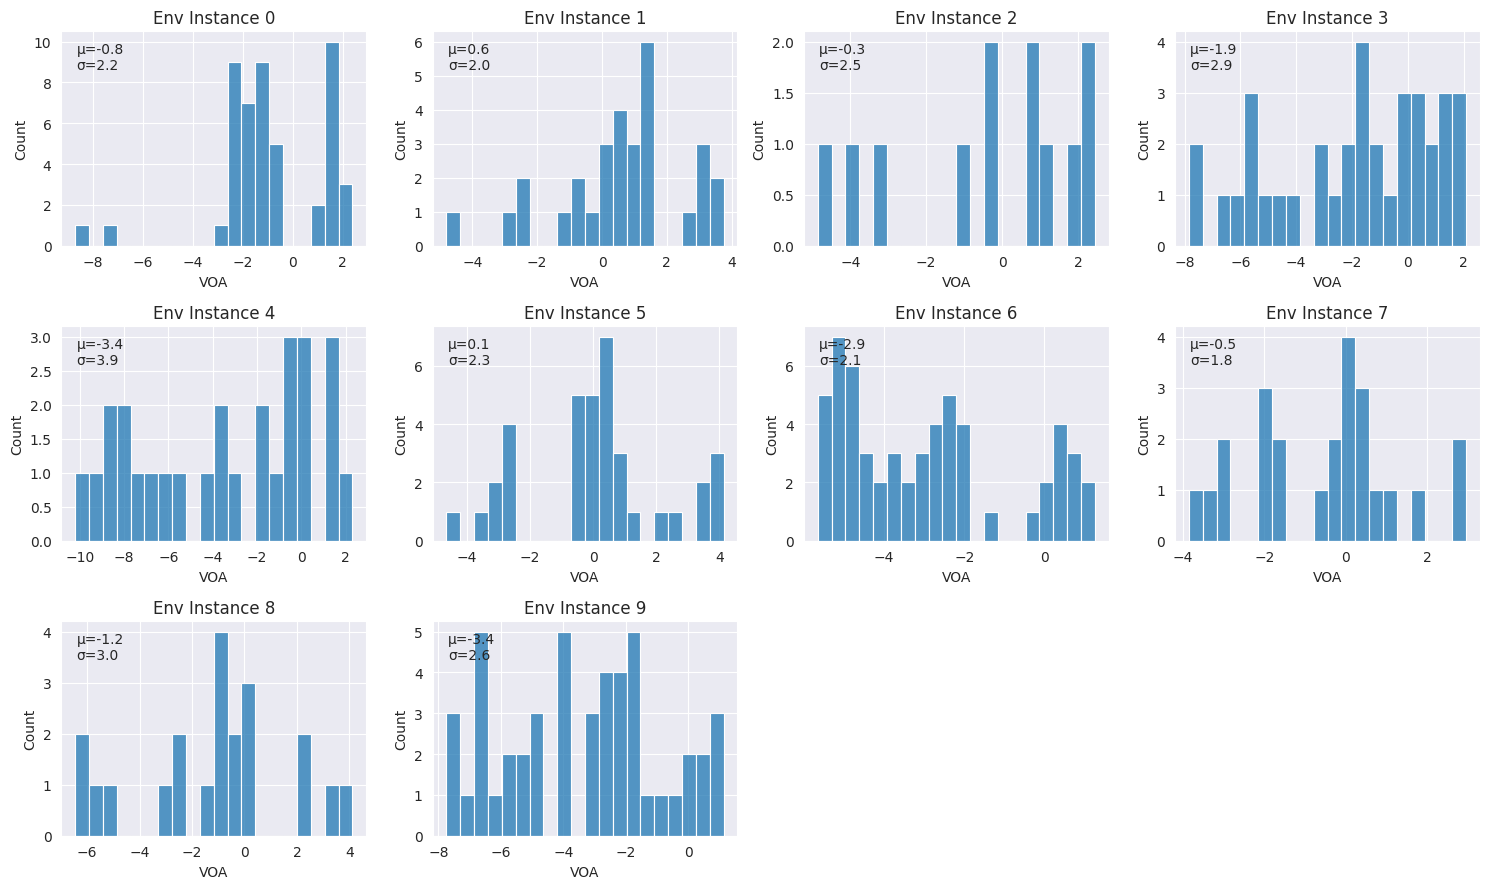


Summary statistics of VOA per environment:
                 count      mean       std        min       25%       50%  \
env_instance_id                                                             
0                 48.0 -0.848580  2.194864  -8.725028 -1.861364 -1.159776   
1                 30.0  0.634850  1.988274  -4.802155 -0.392052  0.769264   
2                 12.0 -0.329568  2.461650  -4.859593 -1.675058  0.344497   
3                 36.0 -1.922464  2.864412  -7.845555 -4.313573 -1.476100   
4                 27.0 -3.381246  3.858872 -10.213473 -7.129720 -2.753135   
5                 36.0  0.082068  2.250154  -4.650333 -0.499538  0.193855   
6                 57.0 -2.925459  2.111288  -5.652230 -4.870967 -3.016351   
7                 24.0 -0.520503  1.837521  -3.851035 -1.954612 -0.090602   
8                 21.0 -1.186729  2.987559  -6.459138 -2.544041 -0.891888   
9                 48.0 -3.364045  2.566322  -7.743316 -5.514827 -3.009982   

                      75%      

In [10]:
# Create a subplot grid based on number of environments
n_envs = len(env_instances_to_analyze)
n_cols = 4  # We can adjust this number to change layout
n_rows = (n_envs + n_cols - 1) // n_cols  # Ceiling division to get required rows

plt.figure(figsize=(15, 3*n_rows))

for idx, env_id in enumerate(env_instances_to_analyze):
   plt.subplot(n_rows, n_cols, idx + 1)
   env_data = voa_df[voa_df['env_instance_id'] == env_id]

   sns.histplot(data=env_data, x='empirical_voa', bins=20)
   plt.title(f'Env Instance {env_id}')
   plt.xlabel('VOA')

   # Add mean and std as text
   mean_voa = env_data['empirical_voa'].mean()
   std_voa = env_data['empirical_voa'].std()
   plt.text(0.05, 0.95, f'μ={mean_voa:.1f}\nσ={std_voa:.1f}',
            transform=plt.gca().transAxes,
            verticalalignment='top')

plt.tight_layout()
plt.show()

# Print summary statistics for each environment
print("\nSummary statistics of VOA per environment:")
print(voa_df.groupby('env_instance_id')['empirical_voa'].describe())

# Confidence

In [11]:
def plot_voa_with_standard_errors(voa_df):
    # Compute standard error
    voa_df['std_error'] = np.sqrt(voa_df['empirical_voa_variance'] / voa_df['n_states'])

    plt.figure(figsize=(10, 5))
    # Create labels for each env-help pair
    labels = [f"Env{row['env_instance_id']}-Help{row['help_config_id']}"
             for _, row in voa_df.iterrows()]

    plt.errorbar(range(len(voa_df)), voa_df['empirical_voa'],
                yerr=voa_df['std_error'], fmt='o', alpha=0.5)
    plt.xticks(range(len(voa_df)), labels, rotation=45)
    plt.xlabel('Environment-Help Configuration')
    plt.ylabel('VOA with Standard Error')
    plt.title('VOA with Standard Error Bars')
    plt.tight_layout()
    plt.show()


def plot_bootstrap_confidence_intervals(vd_df, n_bootstrap=1000):
   results = []
   ci_sizes = {'95': [], '90': [], '80': []}

   percentiles = {
       '95': [2.5, 97.5],
       '90': [5, 95],
       '80': [10, 90]
   }

   for (env_id, help_config), group in vd_df.groupby(['env_instance_id', 'help_config_id']):
       boots = [group['value_diff'].sample(n=len(group), replace=True).mean()
               for _ in range(n_bootstrap)]
       mean_voa = group['value_diff'].mean()

       # Calculate CIs for each confidence level
       cis = {}
       ci_size = {}
       for conf_level, percs in percentiles.items():
           ci_low, ci_high = np.percentile(boots, percs)
           cis[conf_level] = (ci_low, ci_high)
           ci_size[conf_level] = ci_high - ci_low
           ci_sizes[conf_level].append(ci_size[conf_level])

       results.append({
           'env_instance_id': env_id,
           'help_config_id': help_config,
           'voa': mean_voa,
           'ci_low_95': cis['95'][0],
           'ci_high_95': cis['95'][1],
           'ci_size_95': ci_size['95'],
           'ci_low_90': cis['90'][0],
           'ci_high_90': cis['90'][1],
           'ci_size_90': ci_size['90'],
           'ci_low_80': cis['80'][0],
           'ci_high_80': cis['80'][1],
           'ci_size_80': ci_size['80']
       })

   results_df = pd.DataFrame(results)

   # Print statistics for each confidence level
   for conf_level in ['95', '90', '80']:
       print(f"\n{conf_level}% Confidence Interval Size Statistics:")
       print(f"Mean CI size: {np.mean(ci_sizes[conf_level]):.2f}")
       print(f"Median CI size: {np.median(ci_sizes[conf_level]):.2f}")
       print(f"Std of CI sizes: {np.std(ci_sizes[conf_level]):.2f}")
       print(f"Min CI size: {np.min(ci_sizes[conf_level]):.2f}")
       print(f"Max CI size: {np.max(ci_sizes[conf_level]):.2f}")

   # Plot with all confidence levels
   plt.figure(figsize=(12, 6))
   labels = [f"Env{row['env_instance_id']}-Help{row['help_config_id']}"
            for _, row in results_df.iterrows()]

   # Plot different confidence intervals with different colors/styles
   plt.errorbar(range(len(results_df)), results_df['voa'],
               yerr=[results_df['voa'] - results_df['ci_low_95'],
                     results_df['ci_high_95'] - results_df['voa']],
               fmt='o', alpha=0.3, color='blue', label='95% CI')
   plt.errorbar(range(len(results_df)), results_df['voa'],
               yerr=[results_df['voa'] - results_df['ci_low_90'],
                     results_df['ci_high_90'] - results_df['voa']],
               fmt='o', alpha=0.5, color='green', label='90% CI')
   plt.errorbar(range(len(results_df)), results_df['voa'],
               yerr=[results_df['voa'] - results_df['ci_low_80'],
                     results_df['ci_high_80'] - results_df['voa']],
               fmt='o', alpha=0.7, color='red', label='80% CI')

   plt.xticks(range(len(results_df)), labels, rotation=45)
   plt.xlabel('Environment-Help Configuration')
   plt.ylabel('VOA with CIs')
   plt.title('VOA with Different Confidence Intervals')
   plt.legend()
   plt.tight_layout()
   plt.show()

   return results_df, ci_sizes

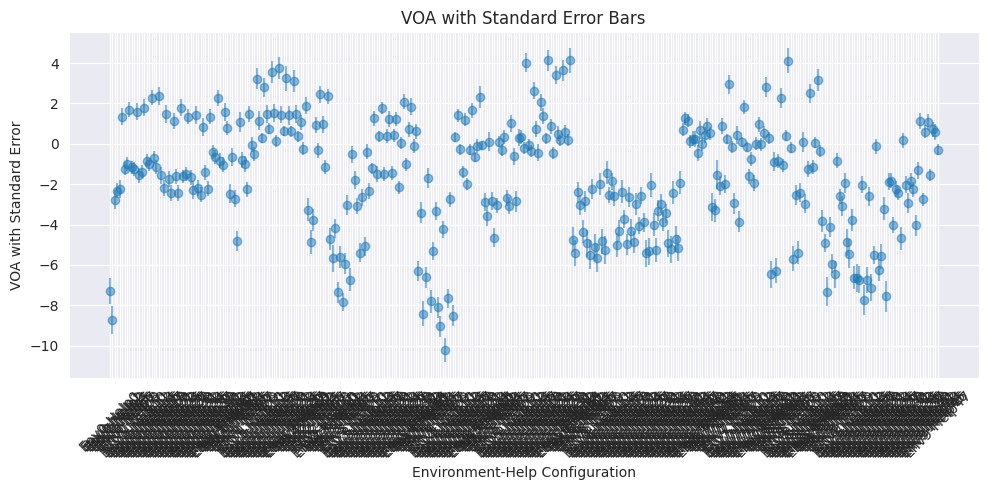

In [12]:
# Plot standard error visualization
plot_voa_with_standard_errors(voa_df)


95% Confidence Interval Size Statistics:
Mean CI size: 1.72
Median CI size: 1.65
Std of CI sizes: 0.45
Min CI size: 0.91
Max CI size: 3.07

90% Confidence Interval Size Statistics:
Mean CI size: 1.45
Median CI size: 1.39
Std of CI sizes: 0.38
Min CI size: 0.76
Max CI size: 2.49

80% Confidence Interval Size Statistics:
Mean CI size: 1.13
Median CI size: 1.08
Std of CI sizes: 0.29
Min CI size: 0.60
Max CI size: 1.93


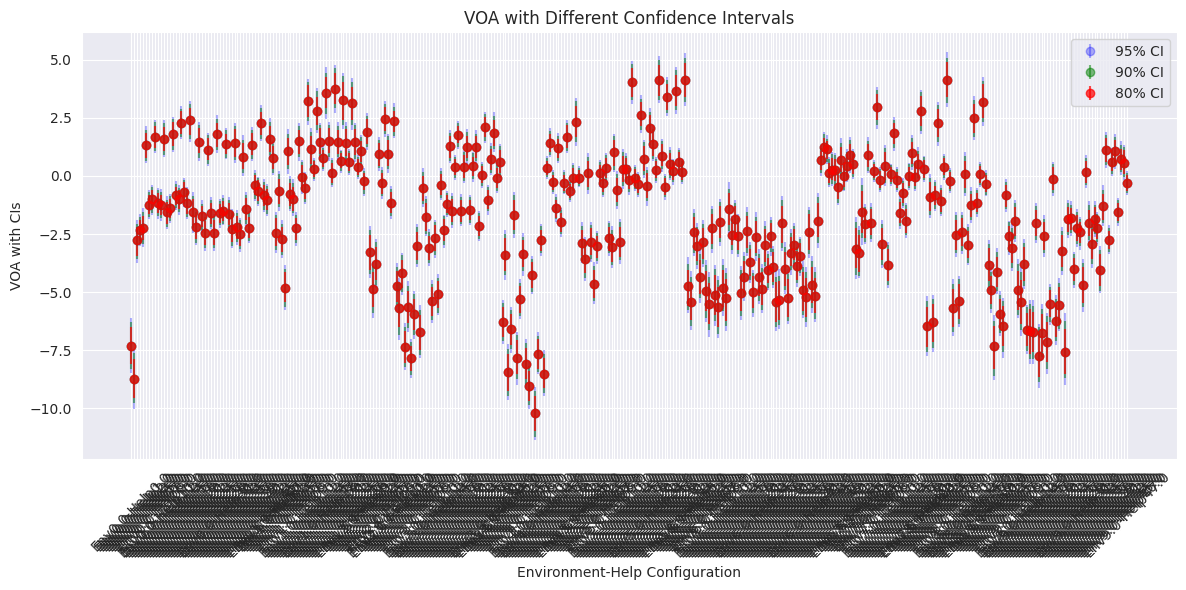

In [13]:
# Plot and get bootstrap CI visualization
bootstrap_results, ci_sizes = plot_bootstrap_confidence_intervals(vd_df, n_bootstrap=1000)

In [14]:
for conf_level in ['95', '90', '80']:
    print(f"\n{conf_level}% Confidence Interval Size Statistics:")
    print(f"Mean CI size: {np.mean(ci_sizes[conf_level]):.2f}")
    print(f"Median CI size: {np.median(ci_sizes[conf_level]):.2f}")
    print(f"Std of CI sizes: {np.std(ci_sizes[conf_level]):.2f}")
    print(f"Min CI size: {np.min(ci_sizes[conf_level]):.2f}")
    print(f"Max CI size: {np.max(ci_sizes[conf_level]):.2f}")


95% Confidence Interval Size Statistics:
Mean CI size: 1.72
Median CI size: 1.65
Std of CI sizes: 0.45
Min CI size: 0.91
Max CI size: 3.07

90% Confidence Interval Size Statistics:
Mean CI size: 1.45
Median CI size: 1.39
Std of CI sizes: 0.38
Min CI size: 0.76
Max CI size: 2.49

80% Confidence Interval Size Statistics:
Mean CI size: 1.13
Median CI size: 1.08
Std of CI sizes: 0.29
Min CI size: 0.60
Max CI size: 1.93


In [15]:
# add the confidence intervals to the voa_df
voa_df = voa_df.merge(bootstrap_results, on=['env_instance_id', 'help_config_id'])

# Huristics

In [16]:
from rocksample_experiments.heuristics import h_first_step_planning_value_diff, h_rollout_policy_value, h_vd_results, h_full_info_planning_value_diff
from rocksample_experiments.heuristics_evaluation import test_heuristic_on_problem_instance, heuristic_metrics, test_heuristic_on_all_instances_parallel, calculate_mean_metrics


In [38]:
def save_test_results(results_dfs_dict, dir_path):
    # make sure the directory exists
    os.makedirs(dir_path, exist_ok=True)
    for i in results_dfs_dict:
        results_dfs_dict[i].to_csv(f'{dir_path}/env{i}.csv')

def load_test_results(dir_path):
    results_dfs_dict = {}
    for file in os.listdir(dir_path):
        if file.endswith(".csv"):
            env_id = int(file.split('env')[1].split('.')[0])
            results_dfs_dict[env_id] = pd.read_csv(f'{dir_path}/{file}', index_col=0)
    return results_dfs_dict

### Baseline mc simulations

In [39]:
n_states = [1, 2, 3, 5, 10, 25, 50, 100]

for n in n_states:
    heuristic_kwargs = {'vd_table': vd_df, 'n_states_to_use': n}
    results_dfs_dict = test_heuristic_on_all_instances_parallel(voa_df, h_vd_results, n_jobs=10, heuristic_kwargs=heuristic_kwargs)
    print("--------------------")
    print(f"n_states: {n}")
    print(calculate_mean_metrics(results_dfs_dict))
    print("--------------------")
    # save_test_results(results_dfs_dict, f'heuristics_evaluation/vd_results_n_states_{n}')

--------------------
n_states: 1
{'top_1_accuracy': 0.2, 'top_5_accuracy': 0.44000000000000006, 'rank_correlation': 0.5243960680784265, 'rank_correlation_pvalue': 0.10115838038477987, 'ci_weighted_correlation': 0.5700162883262512, 'rank_of_best_heuristic': 7.1, 'voa_of_best_heuristic': 1.1784552533831139, 'mean_computation_time': 0.01714443808128428, 'std_computation_time': 0.010904172041613435, 'max_computation_time': 0.051084470748901364, 'min_computation_time': 0.011123299598693848, 'sign_precision': 0.550829346092504, 'sign_recall': 0.6547619047619048, 'sign_accuracy': 0.7234016294264741, 'sign_balanced_accuracy': 0.7103697691197691, 'sign_n_significant': 27.0, 'sign_n_total': 33.9, 'sign_n_significant_positive': 7.6, 'sign_n_significant_negative': 19.4, 'n_environments': 10}
--------------------
--------------------
n_states: 2
{'top_1_accuracy': 0.2, 'top_5_accuracy': 0.5, 'rank_correlation': 0.6769493518475137, 'rank_correlation_pvalue': 0.011260132664268707, 'ci_weighted_correl

### First step planning value difference

uncomment to recalculate:

In [40]:
# Uncomment to recalculate
#
results_dfs_dict = test_heuristic_on_all_instances_parallel(voa_df, h_first_step_planning_value_diff, n_jobs=10)
save_test_results(results_dfs_dict, 'heuristics_evaluation/first_step_planning')

heuristic_kwargs = {'n_trials': 5}
results_dfs_dict = test_heuristic_on_all_instances_parallel(voa_df, h_first_step_planning_value_diff, n_jobs=10
                                                            , heuristic_kwargs=heuristic_kwargs)
save_test_results(results_dfs_dict, 'heuristics_evaluation/first_step_planning_5_trials')

heuristic_kwargs = {'n_trials': 10}
results_dfs_dict = test_heuristic_on_all_instances_parallel(voa_df, h_first_step_planning_value_diff, n_jobs=10
                                                            , heuristic_kwargs=heuristic_kwargs)
save_test_results(results_dfs_dict, 'heuristics_evaluation/first_step_planning_10_trials')

heuristic_kwargs = {'n_sims': 10000, 'max_depth': 100}
results_dfs_dict = test_heuristic_on_all_instances_parallel(voa_df, h_first_step_planning_value_diff, n_jobs=10
                                                            , heuristic_kwargs=heuristic_kwargs)
save_test_results(results_dfs_dict, 'heuristics_evaluation/first_step_planning_10000_sims_100_depth')


In [41]:
results_plain_first_step_planning = load_test_results('heuristics_evaluation/first_step_planning')
print(calculate_mean_metrics(results_plain_first_step_planning))

{'top_1_accuracy': 0.1, 'top_5_accuracy': 0.30000000000000004, 'rank_correlation': 0.5339381711039761, 'rank_correlation_pvalue': 0.08407357207140617, 'ci_weighted_correlation': 0.5369575108686221, 'rank_of_best_heuristic': 10.2, 'voa_of_best_heuristic': 0.6854967171293802, 'mean_computation_time': 2.466485150817359, 'std_computation_time': 0.5079070155155367, 'max_computation_time': 4.006480717658997, 'min_computation_time': 1.9636465549468993, 'sign_precision': 0.48149177122861336, 'sign_recall': 0.9527777777777778, 'sign_accuracy': 0.6395912541564716, 'sign_balanced_accuracy': 0.7230564574314574, 'sign_n_significant': 27.0, 'sign_n_total': 33.9, 'sign_n_significant_positive': 7.6, 'sign_n_significant_negative': 19.4, 'n_environments': 10}


In [42]:
results_first_step_planning_5_trials = load_test_results('heuristics_evaluation/first_step_planning_5_trials')
print(calculate_mean_metrics(results_first_step_planning_5_trials))


{'top_1_accuracy': 0.3, 'top_5_accuracy': 0.38, 'rank_correlation': 0.5611355831157905, 'rank_correlation_pvalue': 0.07694188492192697, 'ci_weighted_correlation': 0.5699425688386557, 'rank_of_best_heuristic': 10.3, 'voa_of_best_heuristic': 0.8037742641895192, 'mean_computation_time': 12.973200536498002, 'std_computation_time': 2.143188685060039, 'max_computation_time': 18.467027997970582, 'min_computation_time': 10.645108723640442, 'sign_precision': 0.49866750208855476, 'sign_recall': 0.9583333333333334, 'sign_accuracy': 0.6514472139316859, 'sign_balanced_accuracy': 0.722972132034632, 'sign_n_significant': 27.0, 'sign_n_total': 33.9, 'sign_n_significant_positive': 7.6, 'sign_n_significant_negative': 19.4, 'n_environments': 10}


In [43]:
results_first_step_planning_10_trials = load_test_results('heuristics_evaluation/first_step_planning_10_trials')
print(calculate_mean_metrics(results_first_step_planning_10_trials))

{'top_1_accuracy': 0.3, 'top_5_accuracy': 0.38, 'rank_correlation': 0.5851377034554356, 'rank_correlation_pvalue': 0.06260936198221677, 'ci_weighted_correlation': 0.5772142392632109, 'rank_of_best_heuristic': 9.1, 'voa_of_best_heuristic': 0.8889849881790359, 'mean_computation_time': 26.981202525277304, 'std_computation_time': 3.964305610526258, 'max_computation_time': 35.749305558204654, 'min_computation_time': 21.890836334228517, 'sign_precision': 0.5112409812409813, 'sign_recall': 0.975, 'sign_accuracy': 0.6719574180133187, 'sign_balanced_accuracy': 0.7433689574314574, 'sign_n_significant': 27.0, 'sign_n_total': 33.9, 'sign_n_significant_positive': 7.6, 'sign_n_significant_negative': 19.4, 'n_environments': 10}


In [44]:
results_first_step_planning_10000_sims_100_depth = load_test_results('heuristics_evaluation/first_step_planning_10000_sims_100_depth')
print(calculate_mean_metrics(results_first_step_planning_10000_sims_100_depth))

{'top_1_accuracy': 0.4, 'top_5_accuracy': 0.54, 'rank_correlation': 0.6290929433736122, 'rank_correlation_pvalue': 0.02083522527356175, 'ci_weighted_correlation': 0.65758747531774, 'rank_of_best_heuristic': 5.9, 'voa_of_best_heuristic': 1.8669513932714665, 'mean_computation_time': 66.15245497835251, 'std_computation_time': 10.650039190673368, 'max_computation_time': 99.49947946071624, 'min_computation_time': 52.9096284866333, 'sign_precision': 0.4593294483294483, 'sign_recall': 0.975, 'sign_accuracy': 0.6277261523845374, 'sign_balanced_accuracy': 0.7139357864357865, 'sign_n_significant': 27.0, 'sign_n_total': 33.9, 'sign_n_significant_positive': 7.6, 'sign_n_significant_negative': 19.4, 'n_environments': 10}


### Rollout policy value

In [45]:
# Uncomment to recalculate

heuristic_kwargs = {'n_rollouts': 10}
results_dfs_dict = test_heuristic_on_all_instances_parallel(voa_df, h_rollout_policy_value, n_jobs=10,
                                                            heuristic_kwargs=heuristic_kwargs)
save_test_results(results_dfs_dict, 'heuristics_evaluation/rollout_policy_value_10_rollouts')

heuristic_kwargs = {'n_rollouts': 100}
results_dfs_dict = test_heuristic_on_all_instances_parallel(voa_df, h_rollout_policy_value, n_jobs=10
                                                            , heuristic_kwargs=heuristic_kwargs)
save_test_results(results_dfs_dict, 'heuristics_evaluation/rollout_policy_value_100_rollouts')

heuristic_kwargs = {'n_rollouts': 1000}
results_dfs_dict = test_heuristic_on_all_instances_parallel(voa_df, h_rollout_policy_value, n_jobs=10
                                                            , heuristic_kwargs=heuristic_kwargs)
save_test_results(results_dfs_dict, 'heuristics_evaluation/rollout_policy_value_1000_rollouts')

In [46]:
results_rollout_policy_value_10_rollouts = load_test_results('heuristics_evaluation/rollout_policy_value_10_rollouts')
print(calculate_mean_metrics(results_rollout_policy_value_10_rollouts))

{'top_1_accuracy': 0.0, 'top_5_accuracy': 0.1, 'rank_correlation': -0.09632497312029094, 'rank_correlation_pvalue': 0.45933188310064255, 'ci_weighted_correlation': -0.07184237727789959, 'rank_of_best_heuristic': 15.7, 'voa_of_best_heuristic': -1.5214634845305943, 'mean_computation_time': 0.06719786868598988, 'std_computation_time': 0.014312580836605419, 'max_computation_time': 0.10899472236633294, 'min_computation_time': 0.05649089813232418, 'sign_precision': 0.31616023220882555, 'sign_recall': 0.43658730158730163, 'sign_accuracy': 0.4524008944816398, 'sign_balanced_accuracy': 0.45815025252525254, 'sign_n_significant': 27.0, 'sign_n_total': 33.9, 'sign_n_significant_positive': 7.6, 'sign_n_significant_negative': 19.4, 'n_environments': 10}


In [47]:
results_rollout_policy_value_100_rollouts = load_test_results('heuristics_evaluation/rollout_policy_value_100_rollouts')
print(calculate_mean_metrics(results_rollout_policy_value_100_rollouts))


{'top_1_accuracy': 0.0, 'top_5_accuracy': 0.18000000000000002, 'rank_correlation': -0.022260541625048348, 'rank_correlation_pvalue': 0.6781755553127174, 'ci_weighted_correlation': -0.013668738941266287, 'rank_of_best_heuristic': 16.9, 'voa_of_best_heuristic': -1.448691809411504, 'mean_computation_time': 0.6773142769161754, 'std_computation_time': 0.13115735952165436, 'max_computation_time': 1.0548746824264525, 'min_computation_time': 0.5228437185287476, 'sign_precision': 0.33065845648604275, 'sign_recall': 0.4086507936507936, 'sign_accuracy': 0.4969986466259758, 'sign_balanced_accuracy': 0.4721685606060606, 'sign_n_significant': 27.0, 'sign_n_total': 33.9, 'sign_n_significant_positive': 7.6, 'sign_n_significant_negative': 19.4, 'n_environments': 10}


In [48]:
results_rollout_policy_value_1000_rollouts = load_test_results('heuristics_evaluation/rollout_policy_value_1000_rollouts')
print(calculate_mean_metrics(results_rollout_policy_value_1000_rollouts))

{'top_1_accuracy': 0.1, 'top_5_accuracy': 0.12000000000000002, 'rank_correlation': -0.2782558938421521, 'rank_correlation_pvalue': 0.2653178998526113, 'ci_weighted_correlation': -0.23538094948090124, 'rank_of_best_heuristic': 24.4, 'voa_of_best_heuristic': -2.7477627447800215, 'mean_computation_time': 6.884514242112222, 'std_computation_time': 1.2446237643832454, 'max_computation_time': 10.344970464706421, 'min_computation_time': 5.687580156326294, 'sign_precision': 0.20837091069849692, 'sign_recall': 0.3001587301587302, 'sign_accuracy': 0.3702400670413093, 'sign_balanced_accuracy': 0.35782783189033185, 'sign_n_significant': 27.0, 'sign_n_total': 33.9, 'sign_n_significant_positive': 7.6, 'sign_n_significant_negative': 19.4, 'n_environments': 10}


### planning with full information

In [49]:
# # Uncomment to recalculate
#
heuristic_kwargs = {'n_states': 1}
results_dfs_dict = test_heuristic_on_all_instances_parallel(voa_df, h_full_info_planning_value_diff, n_jobs=10
                                                            , heuristic_kwargs=heuristic_kwargs)
save_test_results(results_dfs_dict, 'heuristics_evaluation/full_info_planning_n_states_1')

heuristic_kwargs = {'n_states': 5}
results_dfs_dict = test_heuristic_on_all_instances_parallel(voa_df, h_full_info_planning_value_diff, n_jobs=10
                                                            , heuristic_kwargs=heuristic_kwargs)
save_test_results(results_dfs_dict, 'heuristics_evaluation/full_info_planning_n_states_5')

heuristic_kwargs = {'n_states': 50}
results_dfs_dict = test_heuristic_on_all_instances_parallel(voa_df, h_full_info_planning_value_diff, n_jobs=10
                                                            , heuristic_kwargs=heuristic_kwargs)
save_test_results(results_dfs_dict, 'heuristics_evaluation/full_info_planning_n_states_50')

heuristic_kwargs = {'n_states': 200}
results_dfs_dict = test_heuristic_on_all_instances_parallel(voa_df, h_full_info_planning_value_diff, n_jobs=10
                                                            , heuristic_kwargs=heuristic_kwargs)
save_test_results(results_dfs_dict, 'heuristics_evaluation/full_info_planning_n_states_200')

heuristic_kwargs = {'n_states': 1000}
results_dfs_dict = test_heuristic_on_all_instances_parallel(voa_df, h_full_info_planning_value_diff, n_jobs=10
                                                            , heuristic_kwargs=heuristic_kwargs)
save_test_results(results_dfs_dict, 'heuristics_evaluation/full_info_planning_n_states_1000')

heuristic_kwargs = {'n_states': 2000}
results_dfs_dict = test_heuristic_on_all_instances_parallel(voa_df, h_full_info_planning_value_diff, n_jobs=10
                                                            , heuristic_kwargs=heuristic_kwargs)
save_test_results(results_dfs_dict, 'heuristics_evaluation/full_info_planning_n_states_2000')

In [50]:
results_full_info_planning_n_states_1 = load_test_results('heuristics_evaluation/full_info_planning_n_states_1')
print(calculate_mean_metrics(results_full_info_planning_n_states_1))

{'top_1_accuracy': 0.1, 'top_5_accuracy': 0.44000000000000006, 'rank_correlation': 0.4773858210262957, 'rank_correlation_pvalue': 0.10620706556228884, 'ci_weighted_correlation': 0.4572250581129113, 'rank_of_best_heuristic': 8.5, 'voa_of_best_heuristic': 0.5427632459569753, 'mean_computation_time': 0.015917474843024235, 'std_computation_time': 0.012705208442758218, 'max_computation_time': 0.05596814155578609, 'min_computation_time': 0.00865483283996578, 'sign_precision': 0.41466113707493013, 'sign_recall': 0.7883333333333333, 'sign_accuracy': 0.5577987505937816, 'sign_balanced_accuracy': 0.6078526334776335, 'sign_n_significant': 27.0, 'sign_n_total': 33.9, 'sign_n_significant_positive': 7.6, 'sign_n_significant_negative': 19.4, 'n_environments': 10}


In [51]:
results_full_info_planning_n_states_5 = load_test_results('heuristics_evaluation/full_info_planning_n_states_5')
print(calculate_mean_metrics(results_full_info_planning_n_states_5))

{'top_1_accuracy': 0.1, 'top_5_accuracy': 0.42000000000000004, 'rank_correlation': 0.6222068998119676, 'rank_correlation_pvalue': 0.008864734855374477, 'ci_weighted_correlation': 0.6389427029539931, 'rank_of_best_heuristic': 7.0, 'voa_of_best_heuristic': 1.2218420417985236, 'mean_computation_time': 0.015116653883649675, 'std_computation_time': 0.010949183815156227, 'max_computation_time': 0.04865860939025875, 'min_computation_time': 0.008897876739501908, 'sign_precision': 0.4100732150732151, 'sign_recall': 1.0, 'sign_accuracy': 0.5464167854229967, 'sign_balanced_accuracy': 0.6482512626262626, 'sign_n_significant': 27.0, 'sign_n_total': 33.9, 'sign_n_significant_positive': 7.6, 'sign_n_significant_negative': 19.4, 'n_environments': 10}


In [52]:
results_full_info_planning_n_states_50 = load_test_results('heuristics_evaluation/full_info_planning_n_states_50')
print(calculate_mean_metrics(results_full_info_planning_n_states_50))

{'top_1_accuracy': 0.4, 'top_5_accuracy': 0.6799999999999999, 'rank_correlation': 0.7325323919180777, 'rank_correlation_pvalue': 0.0007674457626289622, 'ci_weighted_correlation': 0.7447291556871833, 'rank_of_best_heuristic': 4.1, 'voa_of_best_heuristic': 2.0134601742422444, 'mean_computation_time': 0.02055026646611149, 'std_computation_time': 0.011319180397344272, 'max_computation_time': 0.04895353317260738, 'min_computation_time': 0.01320197582244868, 'sign_precision': 0.4106125038935959, 'sign_recall': 1.0, 'sign_accuracy': 0.5388805535389386, 'sign_balanced_accuracy': 0.6413415404040405, 'sign_n_significant': 27.0, 'sign_n_total': 33.9, 'sign_n_significant_positive': 7.6, 'sign_n_significant_negative': 19.4, 'n_environments': 10}


In [53]:
results_full_info_planning_n_states_200 = load_test_results('heuristics_evaluation/full_info_planning_n_states_200')
print(calculate_mean_metrics(results_full_info_planning_n_states_200))

{'top_1_accuracy': 0.4, 'top_5_accuracy': 0.6799999999999999, 'rank_correlation': 0.7277222393655125, 'rank_correlation_pvalue': 0.0007439704840021195, 'ci_weighted_correlation': 0.7331856003649913, 'rank_of_best_heuristic': 2.4, 'voa_of_best_heuristic': 2.3927075539846774, 'mean_computation_time': 0.038792793675406424, 'std_computation_time': 0.01347710323692342, 'max_computation_time': 0.0634755373001098, 'min_computation_time': 0.02661325931549067, 'sign_precision': 0.4072708427071071, 'sign_recall': 1.0, 'sign_accuracy': 0.5352142991583986, 'sign_balanced_accuracy': 0.6364425505050505, 'sign_n_significant': 27.0, 'sign_n_total': 33.9, 'sign_n_significant_positive': 7.6, 'sign_n_significant_negative': 19.4, 'n_environments': 10}


In [54]:
results_full_info_planning_n_states_1000 = load_test_results('heuristics_evaluation/full_info_planning_n_states_1000')
print(calculate_mean_metrics(results_full_info_planning_n_states_1000))

{'top_1_accuracy': 0.5, 'top_5_accuracy': 0.7, 'rank_correlation': 0.7459786728844309, 'rank_correlation_pvalue': 0.00037114184298584884, 'ci_weighted_correlation': 0.738338723349008, 'rank_of_best_heuristic': 2.4, 'voa_of_best_heuristic': 2.385266223956696, 'mean_computation_time': 0.13188487934886955, 'std_computation_time': 0.027836662157567228, 'max_computation_time': 0.22069201469421382, 'min_computation_time': 0.099304723739624, 'sign_precision': 0.40660141790576576, 'sign_recall': 1.0, 'sign_accuracy': 0.529656547731082, 'sign_balanced_accuracy': 0.635334595959596, 'sign_n_significant': 27.0, 'sign_n_total': 33.9, 'sign_n_significant_positive': 7.6, 'sign_n_significant_negative': 19.4, 'n_environments': 10}


In [55]:
results_full_info_planning_n_states_2000 = load_test_results('heuristics_evaluation/full_info_planning_n_states_2000')
print(calculate_mean_metrics(results_full_info_planning_n_states_2000))


{'top_1_accuracy': 0.5, 'top_5_accuracy': 0.72, 'rank_correlation': 0.7485033773818104, 'rank_correlation_pvalue': 0.0003477052977607419, 'ci_weighted_correlation': 0.7386240529055484, 'rank_of_best_heuristic': 2.4, 'voa_of_best_heuristic': 2.385266223956696, 'mean_computation_time': 0.25744931297858625, 'std_computation_time': 0.03994050079323468, 'max_computation_time': 0.35833427906036375, 'min_computation_time': 0.19305603504180904, 'sign_precision': 0.412644405925498, 'sign_recall': 1.0, 'sign_accuracy': 0.5430425819866814, 'sign_balanced_accuracy': 0.6442203282828283, 'sign_n_significant': 27.0, 'sign_n_total': 33.9, 'sign_n_significant_positive': 7.6, 'sign_n_significant_negative': 19.4, 'n_environments': 10}


In [56]:
# from rocksample_experiments.heuristics import h_full_info_planning_value_all_states
# results_dfs_dict = test_heuristic_on_all_instances_parallel(voa_df, h_full_info_planning_value_all_states, n_jobs=10)
# save_test_results(results_dfs_dict, 'heuristics_evaluation/full_info_planning_all_states')

In [57]:
results_full_info_planning_all_states = load_test_results('heuristics_evaluation/full_info_planning_all_states')
print(calculate_mean_metrics(results_full_info_planning_all_states))

{'top_1_accuracy': 0.7, 'top_5_accuracy': 0.6799999999999999, 'rank_correlation': 0.7417314944825113, 'rank_correlation_pvalue': 0.0004322496975770496, 'ci_weighted_correlation': 0.708872400469843, 'rank_of_best_heuristic': 2.2, 'voa_of_best_heuristic': 2.6412571674189027, 'mean_computation_time': 0.2367766865771715, 'std_computation_time': 0.02952131595826335, 'max_computation_time': 0.30201566219329834, 'min_computation_time': 0.1938602209091186, 'sign_precision': 0.37500330687830685, 'sign_recall': 1.0, 'sign_accuracy': 0.5192168084851012, 'sign_balanced_accuracy': 0.6368165902724726, 'sign_n_significant': 24.8, 'sign_n_total': 33.9, 'sign_n_significant_positive': 6.3, 'sign_n_significant_negative': 18.5, 'n_environments': 10}


--------------------------